# Introduction to the `BrainGlobeAtlas` class

## 0. Creating a `BrainGlobeAtlas` object and list availabe options

To instantiate a `BrainGlobeAtlas` object, we need to instantiate it with the atlas name. The first time we use it, a version of this atlas files will be downloaded from the [remote GIN repository](http://gin.g-node.org/brainglobe/atlases) and stored on your local machine (by default, in .../Users/username/.brainglobe):

In [1]:
from bg_atlasapi import BrainGlobeAtlas
from pprint import pprint

bg_atlas = BrainGlobeAtlas("allen_mouse_100um", check_latest=False)

allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


To know what atlases are available through BrainGlobe, we can use the `show_atlases` function (we need to be online):

In [2]:
from bg_atlasapi import show_atlases
show_atlases()

## 1. Using a `BrainGlobe` atlas

A BrainGlobe atlas is a convenient API for interacting with an anatomical atlas. BrainGlobe atlases contain:
 * Metadata
 * Reference anatomical stack
 * Region annotation stack
 * Hemisphere annotation stack
 * Description of the region hierarchy
 * Meshes for the regions

### 1.0 Metadata

All atlases have a standard set of medatata describing their source, species, resolution, etc:

In [3]:
bg_atlas.metadata

{'name': 'allen_mouse',
 'citation': 'Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007',
 'atlas_link': 'http://www.brain-map.org',
 'species': 'Mus musculus',
 'symmetric': True,
 'resolution': [100.0, 100.0, 100.0],
 'orientation': 'asr',
 'version': '1.2',
 'shape': [132, 80, 114],
 'trasform_to_bg': [[1.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 1.0]],
 'additional_references': []}

### 1.1 Anatomical, annotation and hemispheres stack

In [4]:
from matplotlib import pyplot as plt

Anatomical reference:

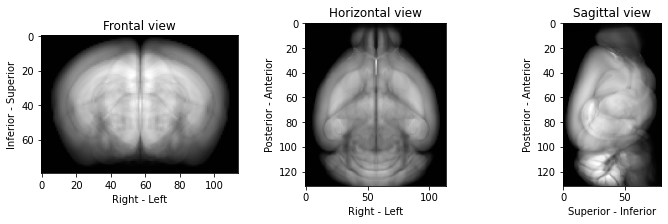

In [5]:
space = bg_atlas.space
stack = bg_atlas.reference

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(stack.mean(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])

Annotations stack:

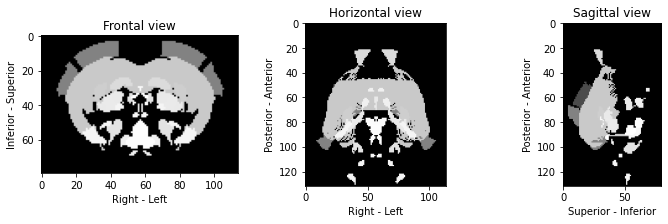

In [6]:
space = bg_atlas.space
stack = bg_atlas.annotation

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(stack.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])

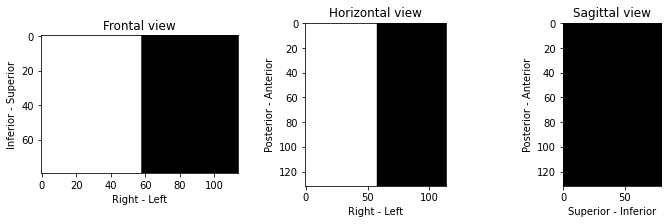

In [7]:
space = bg_atlas.space
stack = bg_atlas.hemispheres

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(stack.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])

### 1.2 Regions hierarchy

The atlas comes with the description of a hierarchy of brain structures. To have an overview:

bg_atlas.structures

The structures attribute is a custom dictionary that can be queried by region number or acronym, and contains all the information for a given structure:

In [8]:
pprint(bg_atlas.structures["root"])

{'acronym': 'root',
 'id': 997,
 'mesh': None,
 'mesh_filename': PosixPath('/Users/luigipetrucco/.brainglobe/allen_mouse_100um_v1.2/meshes/997.obj'),
 'name': 'root',
 'rgb_triplet': [255, 255, 255],
 'structure_id_path': [997]}


In particular, the `structure_id_path` key contains a list description of the path in the hierarchy up to a particular region, and can be used for queries on the hierarchy.

In [9]:
bg_atlas.structures["CH"]["structure_id_path"]

[997, 8, 567]

We can use the `bg_atlas.get_structure_descendants` and `bg_atlas.get_structure_ancestors` methods to explore the hierarchy:

In [10]:
bg_atlas.get_structure_descendants("VISC")

['VISC1', 'VISC2/3', 'VISC4', 'VISC5', 'VISC6a', 'VISC6b']

In [11]:
bg_atlas.get_structure_ancestors("VISC6a")

['root', 'grey', 'CH', 'CTX', 'CTXpl', 'Isocortex', 'VISC']

---
**NOTE**: 
the levels of the hierarchy depends on the underlying atlas, so we cannot ensure the goodness and consistency of their hierarchy three.
---

There is an higher level description of the structures hierarchy that is built using the [treelib](https://treelib.readthedocs.io/en/latest/) package, and is available as: 

In [12]:
bg_atlas.structures.tree

For most applications though the methods described above and the list path of each region should be enough to query the hierarchy without additional layers of complication.

### 1.3 Region masks

Sometimes, we might want to have the mask for a region that is not labelled in the annotation stack as all its voxels have the number of some lower level parcellation in the hierarchy (concretely, if the brain is divided in hindbrain, midbrain, and forebrain, `annotation == root_id` will be all False).

To get the mask for a region, simply:

In [21]:
stack = bg_atlas.get_structure_mask(997)

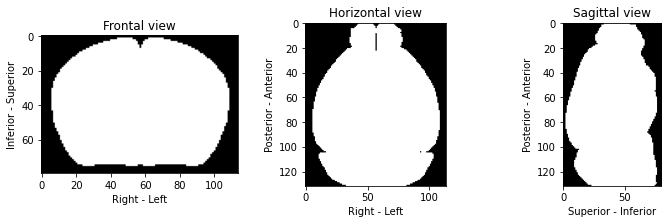

In [22]:
space = bg_atlas.space

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(stack.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])



### 1.3 Regions meshes

If we need to access the structure meshes, we can either query for the file (e.g., if we need to load the file through some library like `vedo`):

In [26]:
bg_atlas.meshfile_from_structure("CH")

PosixPath('/Users/luigipetrucco/.brainglobe/allen_mouse_100um_v1.2/meshes/567.obj')

Or directly obtain the mesh, as a mesh object of the `meshio` library:

In [27]:
bg_atlas.mesh_from_structure("CH")

<meshio mesh object>
  Number of points: 56703
  Number of cells:
    triangle: 112948
  Point data: obj:vn

## 2 Query the `BrainGlobeAtlas`

### 2.0 Query for structures:

A very convenient feature of the `BrainGlobeAtlas` API is the simplicity of querying for the identity of the structure or the hemisphere at a given location, either from stack indexes or space coordinates, and even cutting the hierarchy at some higher level:

In [40]:
# Ask for identity of some indexes in the stack:
print("By index:", bg_atlas.structure_from_coords((50, 40, 30), 
                                                  as_acronym=True))

# Now give coordinates in microns
print("By coordinates:", bg_atlas.structure_from_coords((5000, 4000, 3000), 
                                                        as_acronym=True, 
                                                        microns=True))

# Now cut hierarchy at some level
print("Higher hierarchy level:", bg_atlas.structure_from_coords((5000, 4000, 3000), 
                                                                 as_acronym=True, 
                                                                 microns=True, 
                                                                 hierarchy_lev=2))

By index: CP
By coordinates: CP
Higher hierarchy level: CH


### 2.1 Query for hemispheres

A very similar method can be used for hemispheres. 0 correspond to outside the brain, a,d 1 and 2 to left and right hemispheres - but we can just ask for the side name instead of the number:

In [45]:
# Ask for identity of some indexes in the stack:
print("By index:", bg_atlas.hemisphere_from_coords((50, 40, 30)))

# Now give coordinates in microns
print("By coordinates:", bg_atlas.hemisphere_from_coords((5000, 4000, 3000), microns=True))

# Now print side string
print("By :", bg_atlas.hemisphere_from_coords((5000, 4000, 3000), microns=True))

By index: 2
By coordinates: 2
